In [255]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

# Comparing The Best Predictors of  Lowest Airfare Price

## Sruthi Kannan and Layla Gusa

In [85]:
# Import airlines data
file_path = "/Users/SruthiKannan_1/CDC/Business_Dataset.xlsx"
airlines = pd.read_excel(file_path)
airlines.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [86]:
# Clean airlines data
airlines = airlines.drop(['tbl', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2', 'airportid_1', 'airportid_2', 'airport_2', 'Geocoded_City1', 'Geocoded_City2', 'tbl1apk'], axis = 1)
airlines.head()

,Year,quarter,airport_1,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,2021,3,ABE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43
1,2021,3,ABE,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11
2,2021,3,ABQ,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44
3,2021,3,ABQ,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09
4,2021,3,ABQ,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77


In [89]:
# Filter by top 3 airports with largest number of outgoing passengers
airlines_top3 = airlines[(airlines['airport_1'] == 'BOS') | (airlines['airport_1'] == 'LAX') |(airlines['airport_1'] == 'ORD')]
airlines_top3.head()

,Year,quarter,airport_1,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
496,2021,3,BOS,1562,59,250.53,WN,0.8404,248.96,WN,0.8404,248.96
497,2021,3,BOS,1562,1314,259.52,AA,0.7652,274.33,B6,0.1781,203.57
502,2021,3,BOS,496,523,210.18,DL,0.4497,191.52,DL,0.4497,191.52
505,2021,3,BOS,1754,1960,273.53,UA,0.4734,299.20,WN,0.2224,236.27
508,2021,3,BOS,2300,995,277.55,AA,0.5577,291.78,B6,0.2952,240.78


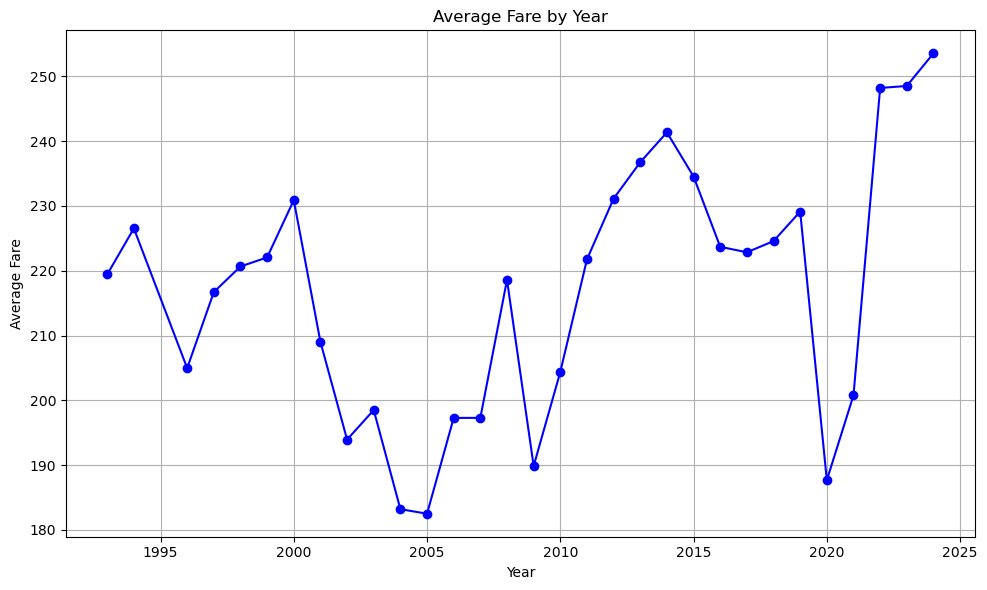

In [118]:
# Add column for mean fare
# Plot mean fare by year
airlines_top3_by_year = airlines_top3.groupby('Year')['fare'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(airlines_top3_by_year['Year'], airlines_top3_by_year['fare'], marker='o', linestyle='-', color='b')
plt.title('Average Fare by Year')
plt.xlabel('Year')
plt.ylabel('Average Fare')
plt.grid(True)
plt.tight_layout()
plt.show()

In [119]:
airlines_top3_by_year.head()

,Year,fare
0,1993,219.418545
1,1994,226.533800
2,1996,204.961870
3,1997,216.704135
4,1998,220.653704


In [128]:
# Fare by year sorted in descending order, top 5
airlines_top3_by_year_sorted = airlines_top3_by_year.sort_values(by='fare', ascending=True)
airlines_top3_by_year_sorted.head(n=5)

,Year,fare
11,2005,182.492855
10,2004,183.191223
26,2020,187.663692
15,2009,189.849153
8,2002,193.932330


In [127]:
# Lowest fare by year sorted in descending order, top 5
airlines_top3_by_year_lf = airlines_top3.groupby('Year')['fare_low'].mean().reset_index()
airlines_top3_by_year_lf_sorted = airlines_top3_by_year_lf.sort_values(by='fare_low', ascending=True)
airlines_top3_by_year_lf_sorted.head(n=5)

,Year,fare_low
11,2005,159.634683
10,2004,161.050026
26,2020,161.506366
8,2002,165.383320
15,2009,167.709570


In [126]:
# Average fare of largest carrier sorted in descending order, top 5
airlines_top3_by_year_lg = airlines_top3.groupby('Year')['fare_lg'].mean().reset_index()
airlines_top3_by_year_lg_sorted = airlines_top3_by_year_lg.sort_values(by='fare_lg', ascending=True)
airlines_top3_by_year_lg_sorted.head(n=5)

,Year,fare_lg
11,2005,184.676121
10,2004,186.133178
26,2020,188.451962
15,2009,192.447392
8,2002,196.514813


In [295]:
# 2005 airlines data
airlines_top3_2005 = airlines_top3[airlines_top3['Year'] == 2005]
airlines_top3_2005.head()

,Year,quarter,airport_1,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
6885,2005,4,LAX,2510,375,314.36,AA,0.19,378.04,DL,0.10,274.21
6907,2005,1,ORD,585,219,159.12,AA,0.68,158.78,UA,0.28,157.54
7004,2005,3,LAX,2329,1110,196.78,WN,0.36,163.15,WN,0.36,163.15
7485,2005,2,BOS,563,421,153.05,CO,0.89,151.69,DL,0.01,137.63
8041,2005,2,LAX,2510,2072,260.50,CO,0.51,264.61,UA,0.12,250.54


In [296]:
cleaned_2005_airlines = airlines_top3_2005.dropna()

In [308]:
# Test Train Split
X = cleaned_2005_airlines[['quarter', 'airport_1', 'nsmiles', 'passengers', 'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low']]
y = cleaned_2005_airlines['fare']
X = pd.get_dummies(X, columns=['airport_1', 'carrier_lg', 'carrier_low'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [259]:
# Lasso Regression
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mse

116.44412002704303

In [260]:
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_r2

0.9553794518947734

In [261]:
lasso_coefficients = lasso.coef_
feature_names = X_train.columns

In [262]:
print("Important predictors and their coefficients:")
for feature, coef in zip(feature_names, lasso_coefficients):
    if coef != 0:
        print(f"Feature: {feature}, Coefficient: {coef}")

Important predictors and their coefficients:
Feature: quarter, Coefficient: 0.3444908965827614
Feature: nsmiles, Coefficient: 0.003304644989781599
Feature: passengers, Coefficient: -0.002075763099659875
Feature: large_ms, Coefficient: 1.5329134649334746
Feature: fare_lg, Coefficient: 0.6641972204528745
Feature: lf_ms, Coefficient: -5.330554690629543
Feature: fare_low, Coefficient: 0.2803010368155184
Feature: airport_1_LAX, Coefficient: -1.3714403167921296
Feature: airport_1_ORD, Coefficient: 0.3665209061206349
Feature: carrier_lg_AA, Coefficient: 1.4395307591550923
Feature: carrier_lg_CO, Coefficient: 0.41366598408714245
Feature: carrier_lg_FL, Coefficient: 0.982415955819244
Feature: carrier_lg_HP, Coefficient: -3.7828085899258066
Feature: carrier_lg_UA, Coefficient: -4.916711729762628
Feature: carrier_low_AA, Coefficient: -1.0718477030647064
Feature: carrier_low_UA, Coefficient: -1.8771724962045284
Feature: carrier_low_US, Coefficient: 1.3080783175884074


In [263]:
best_predictors = [feature for feature, coef in zip(feature_names, lasso_coefficients) if coef != 0]
print(f"Best Predictors: {best_predictors}")

Best Predictors: ['quarter', 'nsmiles', 'passengers', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low', 'airport_1_LAX', 'airport_1_ORD', 'carrier_lg_AA', 'carrier_lg_CO', 'carrier_lg_FL', 'carrier_lg_HP', 'carrier_lg_UA', 'carrier_low_AA', 'carrier_low_UA', 'carrier_low_US']


In [264]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients,
    'Abs_Coefficient': abs(lasso_coefficients)
})
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coef_df[['Feature', 'Coefficient']])

           Feature  Coefficient
5            lf_ms    -5.330555
22   carrier_lg_UA    -4.916712
17   carrier_lg_HP    -3.782809
40  carrier_low_UA    -1.877172
3         large_ms     1.532913
10   carrier_lg_AA     1.439531
8    airport_1_LAX    -1.371440
41  carrier_low_US     1.308078
26  carrier_low_AA    -1.071848
16   carrier_lg_FL     0.982416
4          fare_lg     0.664197
13   carrier_lg_CO     0.413666
9    airport_1_ORD     0.366521
0          quarter     0.344491
6         fare_low     0.280301
1          nsmiles     0.003305
2       passengers    -0.002076
14   carrier_lg_DH     0.000000
30  carrier_low_DH     0.000000
42  carrier_low_WN    -0.000000
39  carrier_low_U5    -0.000000
38  carrier_low_TZ    -0.000000
37  carrier_low_SY     0.000000
36  carrier_low_NW    -0.000000
35  carrier_low_NK     0.000000
34  carrier_low_HP     0.000000
33  carrier_low_FL     0.000000
32  carrier_low_F9     0.000000
31  carrier_low_DL     0.000000
29  carrier_low_CO     0.000000
15   car

In [298]:
# Random Forest Regression
random_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [299]:
y_pred_randfor = random_forest.predict(X_test)
mse_randfor = mean_squared_error(y_test, y_pred_randfor)
rmse_randfor = np.sqrt(mse_randfor)
r_squared_randfor = r2_score(y_test, y_pred_randfor)

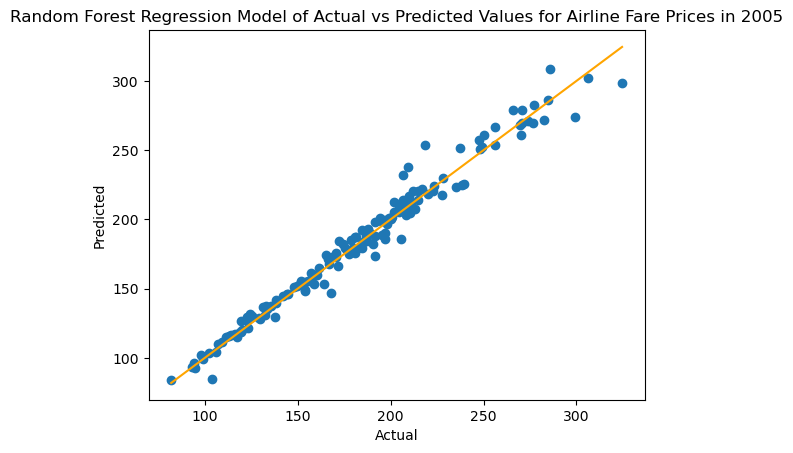

mse:  67.26531585013163
rmse:  8.201543504129672
r_squared:  0.9742244154448759


In [300]:
plt.scatter(y_test, y_pred_randfor)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Model of Actual vs Predicted Values for Airline Fare Prices in 2005')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'orange')
plt.show();
print('mse: ',mse_randfor)
print('rmse: ',rmse_randfor)
print('r_squared: ',r_squared_randfor)

In [309]:
# Gradient Boosting Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_reg = gb_reg.predict(X_test)
mse_grad_boost = mean_squared_error(y_test, y_pred_reg)
r2_grad_boost = r2_score(y_test, y_pred_reg)

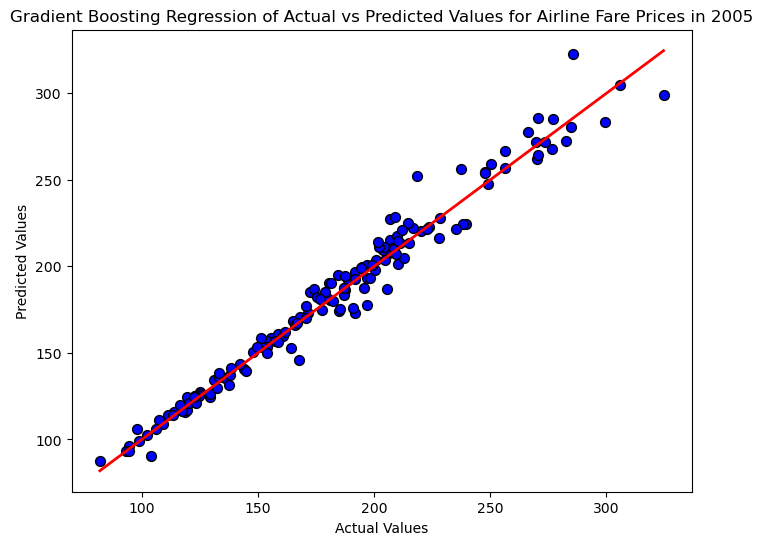

mse:  72.60256811192136
r_squared:  0.9721792188197341


In [310]:
y_pred_reg = gb_reg.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, edgecolors='k', c='blue', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regression of Actual vs Predicted Values for Airline Fare Prices in 2005')
plt.show()
print('mse: ',mse_grad_boost)
print('r_squared: ',r2_grad_boost)

In [175]:
feature_highest_scoring = gb_reg.feature_importances_
feature_names = X_train.columns 
highest_scoring_predictors_df = pd.DataFrame({
    'Feature': feature_names,
    'Highest Scoring Predictors': feature_highest_scoring
})
highest_scoring_features_df = highest_scoring_predictors_df.sort_values(by='Highest Scoring Predictors', ascending=False)
print("Top scoring predictors for fare:")
print(highest_scoring_features_df)

Top scoring predictors for fare:
           Feature  Highest Scoring Predictors
4          fare_lg                8.806886e-01
6         fare_low                9.577343e-02
5            lf_ms                4.869616e-03
2       passengers                4.781703e-03
3         large_ms                4.514102e-03
1          nsmiles                4.399864e-03
24   carrier_lg_WN                1.376892e-03
22   carrier_lg_UA                9.129569e-04
16   carrier_lg_FL                8.938149e-04
10   carrier_lg_AA                3.676564e-04
17   carrier_lg_HP                2.763806e-04
28  carrier_low_B6                1.542226e-04
31  carrier_low_DL                1.297873e-04
18   carrier_lg_NK                1.005338e-04
11   carrier_lg_AS                9.953490e-05
0          quarter                8.455023e-05
14   carrier_lg_DH                8.330218e-05
8    airport_1_LAX                7.986374e-05
29  carrier_low_CO                6.549340e-05
41  carrier_low_US         

In [368]:
# 2004 airlines data
airlines_top3_2004 = airlines_top3[airlines_top3['Year'] == 2004]
airlines_top3_2004.head()

,Year,quarter,airport_1,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
6336,2004,4,ORD,1728,970,192.56,AA,0.47,183.75,AA,0.47,183.75
6515,2004,1,BOS,752,201,308.40,DL,0.86,324.67,US,0.04,125.41
7137,2004,4,LAX,590,1228,110.40,DL,0.50,115.49,WN,0.45,102.79
7562,2004,3,ORD,577,170,201.60,UA,0.49,196.46,UA,0.49,196.46
7599,2004,2,ORD,264,561,184.42,DL,0.48,186.05,UA,0.26,182.60


In [369]:
cleaned_2004_airlines = airlines_top3_2004.dropna()

In [370]:
# Test Train Split
X = cleaned_2004_airlines[['quarter', 'airport_1', 'nsmiles', 'passengers', 'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low']]
y = cleaned_2004_airlines['fare']
X = pd.get_dummies(X, columns=['airport_1', 'carrier_lg', 'carrier_low'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [324]:
# Lasso Regression
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mse

220.35520273894582

In [184]:
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_r2

0.9482887923963722

In [186]:
lasso_coefficients = lasso.coef_
feature_names = X_train.columns

In [187]:
print("Important predictors and their coefficients:")
for feature, coef in zip(feature_names, lasso_coefficients):
    if coef != 0:
        print(f"Feature: {feature}, Coefficient: {coef}")

Important predictors and their coefficients:
Feature: quarter, Coefficient: -0.22068067451612816
Feature: nsmiles, Coefficient: 0.0016369302589267008
Feature: passengers, Coefficient: -0.00306779330055223
Feature: fare_lg, Coefficient: 0.6621763737267946
Feature: lf_ms, Coefficient: -5.002279265701245
Feature: fare_low, Coefficient: 0.2933102411216612
Feature: airport_1_BOS, Coefficient: -0.3583535236896139
Feature: carrier_lg_AA, Coefficient: -1.2686953057836565
Feature: carrier_lg_HP, Coefficient: -6.974187993688311
Feature: carrier_lg_TZ, Coefficient: 4.304019627090912
Feature: carrier_lg_UA, Coefficient: -2.254545938933136
Feature: carrier_low_B6, Coefficient: -1.4756402126568868
Feature: carrier_low_DL, Coefficient: 0.026658355453881073
Feature: carrier_low_TZ, Coefficient: 9.059049272230446
Feature: carrier_low_UA, Coefficient: -0.6915467323660025
Feature: carrier_low_US, Coefficient: 1.056809463907978
Feature: carrier_low_WN, Coefficient: -0.3830612642962695


In [188]:
best_predictors = [feature for feature, coef in zip(feature_names, lasso_coefficients) if coef != 0]
print(f"Best Predictors: {best_predictors}")

Best Predictors: ['quarter', 'nsmiles', 'passengers', 'fare_lg', 'lf_ms', 'fare_low', 'airport_1_BOS', 'carrier_lg_AA', 'carrier_lg_HP', 'carrier_lg_TZ', 'carrier_lg_UA', 'carrier_low_B6', 'carrier_low_DL', 'carrier_low_TZ', 'carrier_low_UA', 'carrier_low_US', 'carrier_low_WN']


In [189]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients,
    'Abs_Coefficient': abs(lasso_coefficients)
})
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coef_df[['Feature', 'Coefficient']])

           Feature  Coefficient
36  carrier_low_TZ     9.059049
16   carrier_lg_HP    -6.974188
5            lf_ms    -5.002279
19   carrier_lg_TZ     4.304020
20   carrier_lg_UA    -2.254546
27  carrier_low_B6    -1.475640
10   carrier_lg_AA    -1.268695
38  carrier_low_US     1.056809
37  carrier_low_UA    -0.691547
4          fare_lg     0.662176
39  carrier_low_WN    -0.383061
7    airport_1_BOS    -0.358354
6         fare_low     0.293310
0          quarter    -0.220681
29  carrier_low_DL     0.026658
2       passengers    -0.003068
1          nsmiles     0.001637
34  carrier_low_NW    -0.000000
33  carrier_low_NK     0.000000
26  carrier_low_AS     0.000000
32  carrier_low_HP     0.000000
31  carrier_low_FL     0.000000
40  carrier_low_YX     0.000000
30  carrier_low_F9    -0.000000
28  carrier_low_CO    -0.000000
35  carrier_low_SY     0.000000
21   carrier_lg_US    -0.000000
25  carrier_low_AA    -0.000000
24   carrier_lg_YY     0.000000
23   carrier_lg_YX    -0.000000
22   car

In [371]:
# Random Forest Regression
random_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [372]:
y_pred_randfor = random_forest.predict(X_test)
mse_randfor = mean_squared_error(y_test, y_pred_randfor)
rmse_randfor = np.sqrt(mse_randfor)
r_squared_randfor = r2_score(y_test, y_pred_randfor)

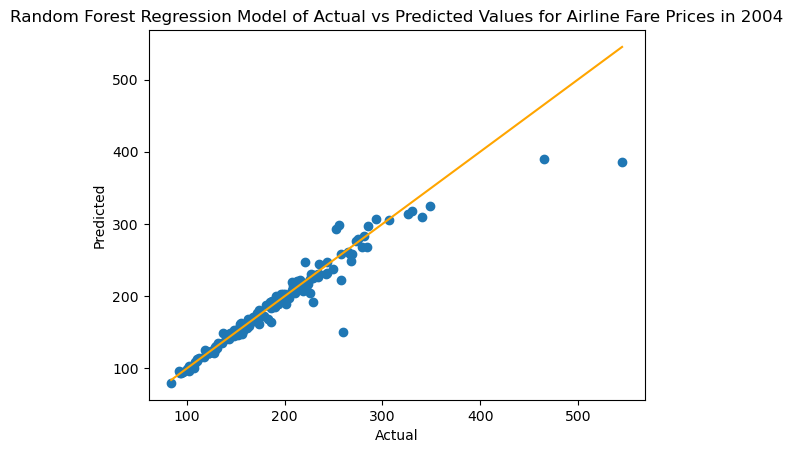

mse:  370.55439240367764
rmse:  19.249789411930657
r_squared:  0.913041240343557


In [374]:
plt.scatter(y_test, y_pred_randfor)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Model of Actual vs Predicted Values for Airline Fare Prices in 2004')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'orange')
plt.show();
print('mse: ',mse_randfor)
print('rmse: ',rmse_randfor)
print('r_squared: ',r_squared_randfor)

In [329]:
# Gradient Boosting Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_reg = gb_reg.predict(X_test)
mse_grad_boost = mean_squared_error(y_test, y_pred_reg)
r2_grad_boost = r2_score(y_test, y_pred_reg)

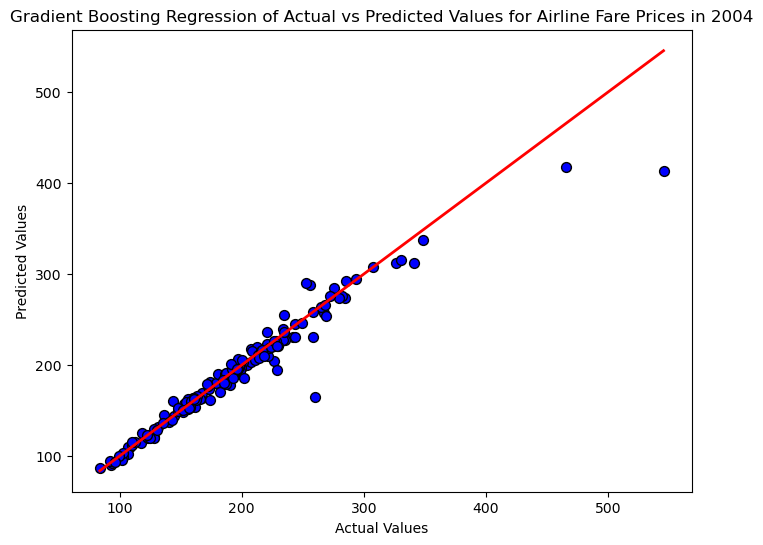

mse:  258.5244035470477
r_squared:  0.9393315477181485


In [330]:
y_pred_reg = gb_reg.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, edgecolors='k', c='blue', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regression of Actual vs Predicted Values for Airline Fare Prices in 2004')
plt.show()
print('mse: ',mse_grad_boost)
print('r_squared: ',r2_grad_boost)

In [195]:
feature_highest_scoring = gb_reg.feature_importances_
feature_names = X_train.columns 
highest_scoring_predictors_df = pd.DataFrame({
    'Feature': feature_names,
    'Highest Scoring Predictors': feature_highest_scoring
})
highest_scoring_features_df = highest_scoring_predictors_df.sort_values(by='Highest Scoring Predictors', ascending=False)
print("Top scoring predictors for fare:")
print(highest_scoring_features_df)

Top scoring predictors for fare:
           Feature  Highest Scoring Predictors
4          fare_lg                    0.881065
6         fare_low                    0.088337
1          nsmiles                    0.005808
5            lf_ms                    0.005195
19   carrier_lg_TZ                    0.005028
3         large_ms                    0.004800
2       passengers                    0.003769
16   carrier_lg_HP                    0.002191
36  carrier_low_TZ                    0.001991
0          quarter                    0.000565
17   carrier_lg_NK                    0.000323
20   carrier_lg_UA                    0.000164
27  carrier_low_B6                    0.000122
37  carrier_low_UA                    0.000085
28  carrier_low_CO                    0.000072
32  carrier_low_HP                    0.000064
29  carrier_low_DL                    0.000061
33  carrier_low_NK                    0.000055
8    airport_1_LAX                    0.000043
39  carrier_low_WN         

In [351]:
# 2020 airlines data
airlines_top3_2020 = airlines_top3[airlines_top3['Year'] == 2020]
airlines_top3_2020.head()

,Year,quarter,airport_1,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
219318,2020,1,BOS,942,809,143.58,WN,0.3991,131.77,WN,0.3991,131.77
219319,2020,1,BOS,395,299,132.52,B6,0.5958,129.73,B6,0.5958,129.73
219320,2020,1,BOS,2611,140,189.47,B6,0.8126,183.70,WN,0.0441,169.59
219321,2020,1,BOS,418,988,124.26,WN,0.6423,122.17,WN,0.6423,122.17
219322,2020,1,BOS,563,8,192.72,AA,0.6883,184.71,UA,0.2468,176.42


In [352]:
cleaned_2020_airlines = airlines_top3_2020.dropna()

In [353]:
# Test Train Split
X = cleaned_2020_airlines[['quarter', 'airport_1', 'nsmiles', 'passengers', 'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low']]
y = cleaned_2020_airlines['fare']
X = pd.get_dummies(X, columns=['airport_1', 'carrier_lg', 'carrier_low'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [211]:
# Lasso Regression
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mse

120.68376498239512

In [212]:
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_r2

0.9616961663457373

In [213]:
lasso_coefficients = lasso.coef_
feature_names = X_train.columns

In [214]:
print("Important predictors and their coefficients:")
for feature, coef in zip(feature_names, lasso_coefficients):
    if coef != 0:
        print(f"Feature: {feature}, Coefficient: {coef}")

Important predictors and their coefficients:
Feature: quarter, Coefficient: -2.6889581971127936
Feature: nsmiles, Coefficient: 0.0039048180058926987
Feature: passengers, Coefficient: -0.003307136135340796
Feature: large_ms, Coefficient: -1.3857921434281928
Feature: fare_lg, Coefficient: 0.5896742463961242
Feature: lf_ms, Coefficient: -7.534889504980592
Feature: fare_low, Coefficient: 0.3416068456337997
Feature: airport_1_BOS, Coefficient: -1.5323666941546226
Feature: airport_1_LAX, Coefficient: 4.458181245363974
Feature: carrier_lg_AA, Coefficient: 1.8692827773220566
Feature: carrier_lg_B6, Coefficient: -1.5418569375753914
Feature: carrier_lg_DL, Coefficient: -4.828354276707684
Feature: carrier_lg_G4, Coefficient: 38.90223161369438
Feature: carrier_lg_NK, Coefficient: 26.6835601552788
Feature: carrier_lg_UA, Coefficient: -3.3281198312093427
Feature: carrier_low_AA, Coefficient: -0.4823533170442747
Feature: carrier_low_AS, Coefficient: 0.6025937763651816
Feature: carrier_low_NK, Coeffic

In [215]:
best_predictors = [feature for feature, coef in zip(feature_names, lasso_coefficients) if coef != 0]
print(f"Best Predictors: {best_predictors}")

Best Predictors: ['quarter', 'nsmiles', 'passengers', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low', 'airport_1_BOS', 'airport_1_LAX', 'carrier_lg_AA', 'carrier_lg_B6', 'carrier_lg_DL', 'carrier_lg_G4', 'carrier_lg_NK', 'carrier_lg_UA', 'carrier_low_AA', 'carrier_low_AS', 'carrier_low_NK', 'carrier_low_UA', 'carrier_low_WN']


In [216]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients,
    'Abs_Coefficient': abs(lasso_coefficients)
})
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coef_df[['Feature', 'Coefficient']])

           Feature  Coefficient
14   carrier_lg_G4    38.902232
15   carrier_lg_NK    26.683560
5            lf_ms    -7.534890
13   carrier_lg_DL    -4.828354
8    airport_1_LAX     4.458181
25  carrier_low_NK     4.058415
17   carrier_lg_UA    -3.328120
0          quarter    -2.688958
10   carrier_lg_AA     1.869283
27  carrier_low_UA    -1.626033
12   carrier_lg_B6    -1.541857
7    airport_1_BOS    -1.532367
3         large_ms    -1.385792
20  carrier_low_AS     0.602594
4          fare_lg     0.589674
28  carrier_low_WN    -0.506335
19  carrier_low_AA    -0.482353
6         fare_low     0.341607
1          nsmiles     0.003905
2       passengers    -0.003307
16   carrier_lg_SY     0.000000
9    airport_1_ORD    -0.000000
21  carrier_low_B6    -0.000000
22  carrier_low_DL    -0.000000
23  carrier_low_F9     0.000000
24  carrier_low_G4     0.000000
26  carrier_low_SY     0.000000
11   carrier_lg_AS    -0.000000
18   carrier_lg_WN     0.000000


In [354]:
# Random Forest Regression
random_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [355]:
y_pred_randfor = random_forest.predict(X_test)
mse_randfor = mean_squared_error(y_test, y_pred_randfor)
rmse_randfor = np.sqrt(mse_randfor)
r_squared_randfor = r2_score(y_test, y_pred_randfor)

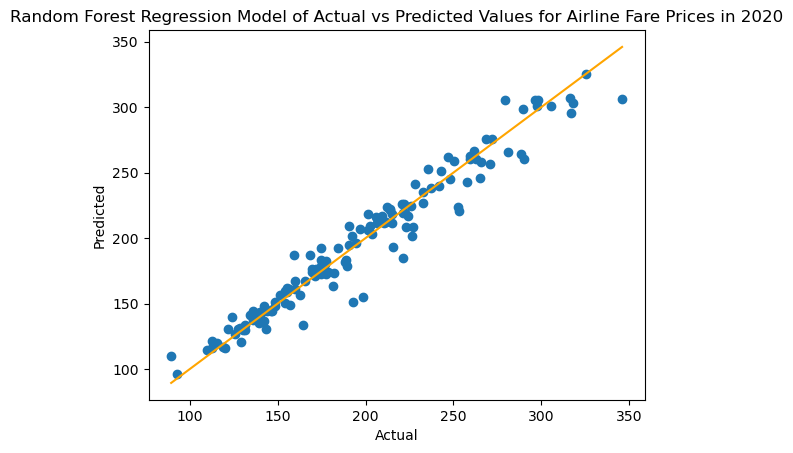

mse:  159.61809322217417
rmse:  12.634005430669015
r_squared:  0.9493387955547737


In [357]:
plt.scatter(y_test, y_pred_randfor)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Model of Actual vs Predicted Values for Airline Fare Prices in 2020')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'orange')
plt.show();
print('mse: ',mse_randfor)
print('rmse: ',rmse_randfor)
print('r_squared: ',r_squared_randfor)

In [358]:
# Gradient Boosting Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_reg = gb_reg.predict(X_test)
mse_grad_boost = mean_squared_error(y_test, y_pred_reg)
r2_grad_boost = r2_score(y_test, y_pred_reg)

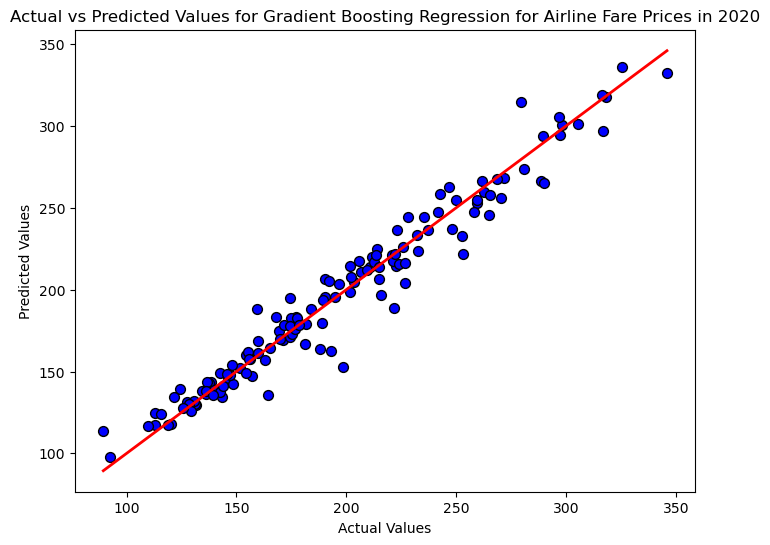

mse:  135.78397954388
r_squared:  0.9569035075586074


In [359]:
y_pred_reg = gb_reg.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, edgecolors='k', c='blue', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Gradient Boosting Regression for Airline Fare Prices in 2020')
plt.show()
print('mse: ',mse_grad_boost)
print('r_squared: ',r2_grad_boost)

In [221]:
feature_highest_scoring = gb_reg.feature_importances_
feature_names = X_train.columns 
highest_scoring_predictors_df = pd.DataFrame({
    'Feature': feature_names,
    'Highest Scoring Predictors': feature_highest_scoring
})
highest_scoring_features_df = highest_scoring_predictors_df.sort_values(by='Highest Scoring Predictors', ascending=False)
print("Top scoring predictors for fare:")
print(highest_scoring_features_df)

Top scoring predictors for fare:
           Feature  Highest Scoring Predictors
4          fare_lg                8.418073e-01
6         fare_low                1.122989e-01
1          nsmiles                9.527806e-03
3         large_ms                8.543593e-03
5            lf_ms                6.573324e-03
2       passengers                6.385061e-03
0          quarter                3.899532e-03
14   carrier_lg_G4                3.028046e-03
15   carrier_lg_NK                2.376862e-03
8    airport_1_LAX                1.385284e-03
10   carrier_lg_AA                1.338868e-03
24  carrier_low_G4                9.279994e-04
25  carrier_low_NK                4.542908e-04
13   carrier_lg_DL                4.338708e-04
7    airport_1_BOS                3.710413e-04
17   carrier_lg_UA                3.287014e-04
20  carrier_low_AS                8.306433e-05
23  carrier_low_F9                8.229851e-05
19  carrier_low_AA                4.842830e-05
16   carrier_lg_SY         

In [381]:
# 2009 airlines data
airlines_top3_2009 = airlines_top3[airlines_top3['Year'] == 2009]
airlines_top3_2009.head()

,Year,quarter,airport_1,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
6227,2009,3,LAX,1593,785,209.13,AA,0.69,216.77,WN,0.15,185.02
6432,2009,1,ORD,802,1768,200.97,AA,0.76,203.92,UA,0.20,190.23
6640,2009,1,ORD,1197,1061,164.76,AA,0.50,187.87,NK,0.25,124.19
6714,2009,2,LAX,2330,170,206.39,CO,0.31,184.83,CO,0.31,184.83
6752,2009,2,ORD,1014,879,152.70,UA,0.44,152.69,AA,0.38,148.51


In [382]:
cleaned_2009_airlines = airlines_top3_2009.dropna()

In [383]:
# Test Train Split
X = cleaned_2009_airlines[['quarter', 'airport_1', 'nsmiles', 'passengers', 'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low']]
y = cleaned_2009_airlines['fare']
X = pd.get_dummies(X, columns=['airport_1', 'carrier_lg', 'carrier_low'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [228]:
# Lasso Regression
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mse

103.67432925980066

In [229]:
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_r2

0.9711161972393352

In [230]:
lasso_coefficients = lasso.coef_
feature_names = X_train.columns

In [231]:
print("Important predictors and their coefficients:")
for feature, coef in zip(feature_names, lasso_coefficients):
    if coef != 0:
        print(f"Feature: {feature}, Coefficient: {coef}")

Important predictors and their coefficients:
Feature: nsmiles, Coefficient: 0.0009176695599582807
Feature: passengers, Coefficient: -0.0028243011452701145
Feature: fare_lg, Coefficient: 0.6411801762775006
Feature: lf_ms, Coefficient: -5.6960093207078595
Feature: fare_low, Coefficient: 0.33857732909605137
Feature: airport_1_BOS, Coefficient: -1.0812418073940397
Feature: airport_1_ORD, Coefficient: 0.5535636181818296
Feature: carrier_lg_AA, Coefficient: 0.27848568158651116
Feature: carrier_lg_AS, Coefficient: -0.42630534090835737
Feature: carrier_lg_B6, Coefficient: -1.5163734739139068
Feature: carrier_lg_NK, Coefficient: 3.5483269541127376
Feature: carrier_lg_UA, Coefficient: -5.769851221799772
Feature: carrier_lg_US, Coefficient: -2.478736655568889
Feature: carrier_low_FL, Coefficient: 1.9228990572553626
Feature: carrier_low_NK, Coefficient: 1.3790177802889074
Feature: carrier_low_WN, Coefficient: -0.7706724398267886


In [232]:
best_predictors = [feature for feature, coef in zip(feature_names, lasso_coefficients) if coef != 0]
print(f"Best Predictors: {best_predictors}")

Best Predictors: ['nsmiles', 'passengers', 'fare_lg', 'lf_ms', 'fare_low', 'airport_1_BOS', 'airport_1_ORD', 'carrier_lg_AA', 'carrier_lg_AS', 'carrier_lg_B6', 'carrier_lg_NK', 'carrier_lg_UA', 'carrier_lg_US', 'carrier_low_FL', 'carrier_low_NK', 'carrier_low_WN']


In [233]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients,
    'Abs_Coefficient': abs(lasso_coefficients)
})
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coef_df[['Feature', 'Coefficient']])

           Feature  Coefficient
20   carrier_lg_UA    -5.769851
5            lf_ms    -5.696009
17   carrier_lg_NK     3.548327
21   carrier_lg_US    -2.478737
30  carrier_low_FL     1.922899
12   carrier_lg_B6    -1.516373
32  carrier_low_NK     1.379018
7    airport_1_BOS    -1.081242
39  carrier_low_WN    -0.770672
4          fare_lg     0.641180
9    airport_1_ORD     0.553564
11   carrier_lg_AS    -0.426305
6         fare_low     0.338577
10   carrier_lg_AA     0.278486
2       passengers    -0.002824
1          nsmiles     0.000918
29  carrier_low_F9    -0.000000
31  carrier_low_G4     0.000000
37  carrier_low_US    -0.000000
33  carrier_low_NW     0.000000
34  carrier_low_SY     0.000000
35  carrier_low_U5    -0.000000
36  carrier_low_UA    -0.000000
27  carrier_low_CO    -0.000000
38  carrier_low_VX    -0.000000
28  carrier_low_DL    -0.000000
0          quarter     0.000000
26  carrier_low_B6    -0.000000
25  carrier_low_AS    -0.000000
24  carrier_low_AA     0.000000
23   car

In [384]:
# Random Forest Regression
random_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [385]:
y_pred_randfor = random_forest.predict(X_test)
mse_randfor = mean_squared_error(y_test, y_pred_randfor)
rmse_randfor = np.sqrt(mse_randfor)
r_squared_randfor = r2_score(y_test, y_pred_randfor)

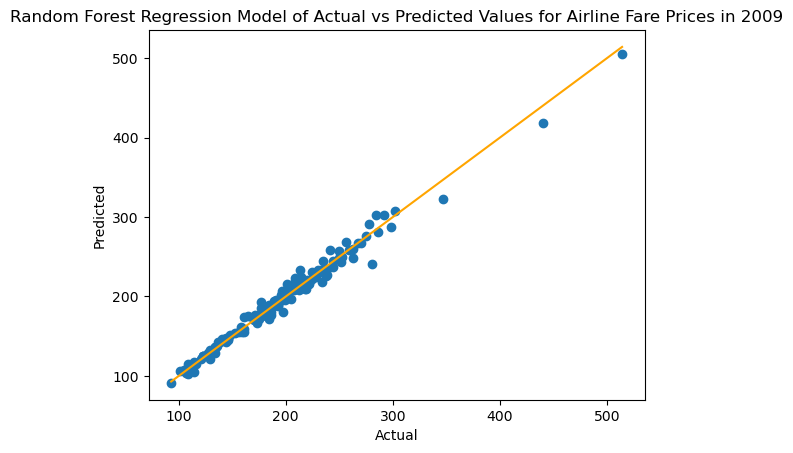

mse:  61.216743868187976
rmse:  7.824112976445827
r_squared:  0.9829449356637943


In [386]:
plt.scatter(y_test, y_pred_randfor)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Model of Actual vs Predicted Values for Airline Fare Prices in 2009')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'orange')
plt.show()
print('mse: ',mse_randfor)
print('rmse: ',rmse_randfor)
print('r_squared: ',r_squared_randfor)

In [366]:
# Gradient Boosting Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_reg = gb_reg.predict(X_test)
mse_grad_boost = mean_squared_error(y_test, y_pred_reg)
r2_grad_boost = r2_score(y_test, y_pred_reg)

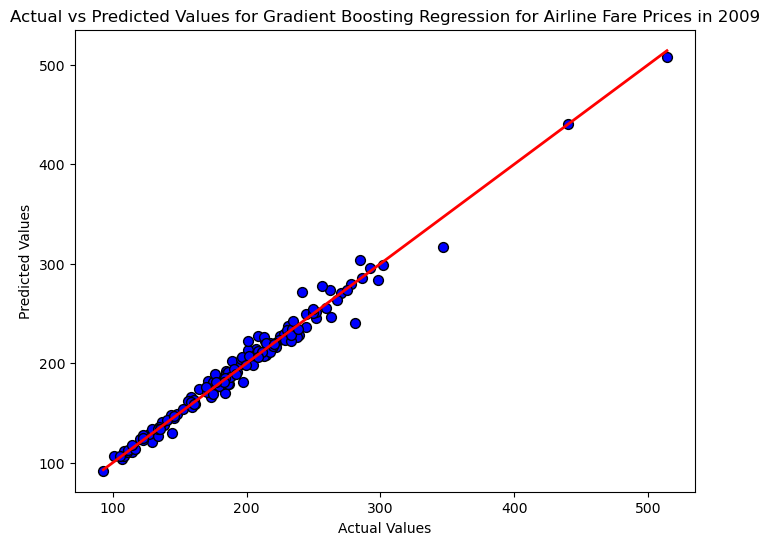

mse:  64.34119894455529
r_squared:  0.9820744584221792


In [367]:
y_pred_reg = gb_reg.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, edgecolors='k', c='blue', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Gradient Boosting Regression for Airline Fare Prices in 2009')
plt.show()
print('mse: ',mse_grad_boost)
print('r_squared: ',r2_grad_boost)

In [238]:
feature_highest_scoring = gb_reg.feature_importances_
feature_names = X_train.columns 
highest_scoring_predictors_df = pd.DataFrame({
    'Feature': feature_names,
    'Highest Scoring Predictors': feature_highest_scoring
})
highest_scoring_features_df = highest_scoring_predictors_df.sort_values(by='Highest Scoring Predictors', ascending=False)
print("Top scoring predictors for fare:")
print(highest_scoring_features_df)

Top scoring predictors for fare:
           Feature  Highest Scoring Predictors
4          fare_lg                    0.851605
6         fare_low                    0.112541
2       passengers                    0.013864
3         large_ms                    0.008939
5            lf_ms                    0.005540
1          nsmiles                    0.005389
20   carrier_lg_UA                    0.000323
16   carrier_lg_G4                    0.000225
8    airport_1_LAX                    0.000206
27  carrier_low_CO                    0.000152
26  carrier_low_B6                    0.000122
12   carrier_lg_B6                    0.000119
30  carrier_low_FL                    0.000109
7    airport_1_BOS                    0.000108
17   carrier_lg_NK                    0.000107
13   carrier_lg_CO                    0.000089
36  carrier_low_UA                    0.000074
33  carrier_low_NW                    0.000073
32  carrier_low_NK                    0.000068
21   carrier_lg_US         

In [387]:
# 2002 airlines data
airlines_top3_2002 = airlines_top3[airlines_top3['Year'] == 2002]
airlines_top3_2002.head()

,Year,quarter,airport_1,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
6074,2002,2,LAX,1756,318,211.58,YX,0.49,215.25,YX,0.49,215.25
6109,2002,4,BOS,2611,183,292.25,AA,0.37,289.46,HP,0.10,287.83
6167,2002,3,ORD,678,2000,165.55,UA,0.42,172.35,US,0.28,154.94
6182,2002,4,ORD,802,1670,218.32,AA,0.67,223.17,UA,0.24,221.47
6251,2002,1,LAX,2510,1950,301.48,CO,0.39,334.61,AA,0.22,284.60


In [388]:
cleaned_2002_airlines = airlines_top3_2002.dropna()

In [389]:
# Test Train Split
X = cleaned_2002_airlines[['quarter', 'airport_1', 'nsmiles', 'passengers', 'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low']]
y = cleaned_2002_airlines['fare']
X = pd.get_dummies(X, columns=['airport_1', 'carrier_lg', 'carrier_low'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [243]:
# Lasso Regression
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mse

249.3126252704436

In [244]:
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_r2

0.9395794305230917

In [245]:
lasso_coefficients = lasso.coef_
feature_names = X_train.columns

In [246]:
print("Important predictors and their coefficients:")
for feature, coef in zip(feature_names, lasso_coefficients):
    if coef != 0:
        print(f"Feature: {feature}, Coefficient: {coef}")

Important predictors and their coefficients:
Feature: quarter, Coefficient: -0.6370527383300911
Feature: nsmiles, Coefficient: 0.001536760989686149
Feature: passengers, Coefficient: -0.0036060984836259456
Feature: fare_lg, Coefficient: 0.6676623466709477
Feature: lf_ms, Coefficient: -6.915663728954844
Feature: fare_low, Coefficient: 0.26415043776242303
Feature: airport_1_BOS, Coefficient: -0.1280227486911746
Feature: airport_1_ORD, Coefficient: 0.460679517168136
Feature: carrier_lg_AA, Coefficient: -0.250666649584181
Feature: carrier_lg_AS, Coefficient: -0.44838778462237966
Feature: carrier_lg_DL, Coefficient: -2.481774497122402
Feature: carrier_lg_NK, Coefficient: 7.544162183213751
Feature: carrier_lg_NW, Coefficient: 2.351799958452798
Feature: carrier_lg_TZ, Coefficient: 1.8018748752538087
Feature: carrier_lg_UA, Coefficient: -5.585831566973372
Feature: carrier_lg_US, Coefficient: 1.2035927408932725
Feature: carrier_low_AA, Coefficient: -2.9494768642671265
Feature: carrier_low_CO, Co

In [247]:
best_predictors = [feature for feature, coef in zip(feature_names, lasso_coefficients) if coef != 0]
print(f"Best Predictors: {best_predictors}")

Best Predictors: ['quarter', 'nsmiles', 'passengers', 'fare_lg', 'lf_ms', 'fare_low', 'airport_1_BOS', 'airport_1_ORD', 'carrier_lg_AA', 'carrier_lg_AS', 'carrier_lg_DL', 'carrier_lg_NK', 'carrier_lg_NW', 'carrier_lg_TZ', 'carrier_lg_UA', 'carrier_lg_US', 'carrier_low_AA', 'carrier_low_CO', 'carrier_low_DL', 'carrier_low_HP', 'carrier_low_NK', 'carrier_low_NW', 'carrier_low_UA', 'carrier_low_US']


In [248]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients,
    'Abs_Coefficient': abs(lasso_coefficients)
})
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coef_df[['Feature', 'Coefficient']])

           Feature  Coefficient
32  carrier_low_NK     9.610395
17   carrier_lg_NK     7.544162
5            lf_ms    -6.915664
20   carrier_lg_UA    -5.585832
33  carrier_low_NW    -4.108601
24  carrier_low_AA    -2.949477
27  carrier_low_DL    -2.917048
13   carrier_lg_DL    -2.481774
18   carrier_lg_NW     2.351800
19   carrier_lg_TZ     1.801875
21   carrier_lg_US     1.203593
26  carrier_low_CO     0.988644
36  carrier_low_UA     0.953544
29  carrier_low_HP     0.694136
4          fare_lg     0.667662
0          quarter    -0.637053
9    airport_1_ORD     0.460680
11   carrier_lg_AS    -0.448388
37  carrier_low_US     0.376942
6         fare_low     0.264150
10   carrier_lg_AA    -0.250667
7    airport_1_BOS    -0.128023
2       passengers    -0.003606
1          nsmiles     0.001537
16   carrier_lg_N7     0.000000
31  carrier_low_N7    -0.000000
38  carrier_low_WN     0.000000
35  carrier_low_TZ    -0.000000
34  carrier_low_SY     0.000000
3         large_ms     0.000000
28  carr

In [390]:
# Random Forest Regression
random_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [391]:
y_pred_randfor = random_forest.predict(X_test)
mse_randfor = mean_squared_error(y_test, y_pred_randfor)
rmse_randfor = np.sqrt(mse_randfor)
r_squared_randfor = r2_score(y_test, y_pred_randfor)

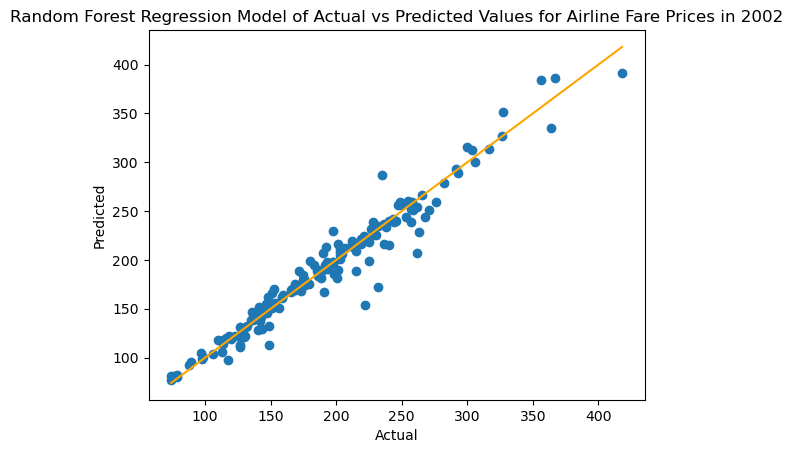

mse:  209.08499663634603
rmse:  14.459771666120666
r_squared:  0.9493285406138509


In [392]:
plt.scatter(y_test, y_pred_randfor)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Model of Actual vs Predicted Values for Airline Fare Prices in 2002')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'orange')
plt.show()
print('mse: ',mse_randfor)
print('rmse: ',rmse_randfor)
print('r_squared: ',r_squared_randfor)

In [393]:
# Gradient Boosting Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_reg = gb_reg.predict(X_test)
mse_grad_boost = mean_squared_error(y_test, y_pred_reg)
r2_grad_boost = r2_score(y_test, y_pred_reg)

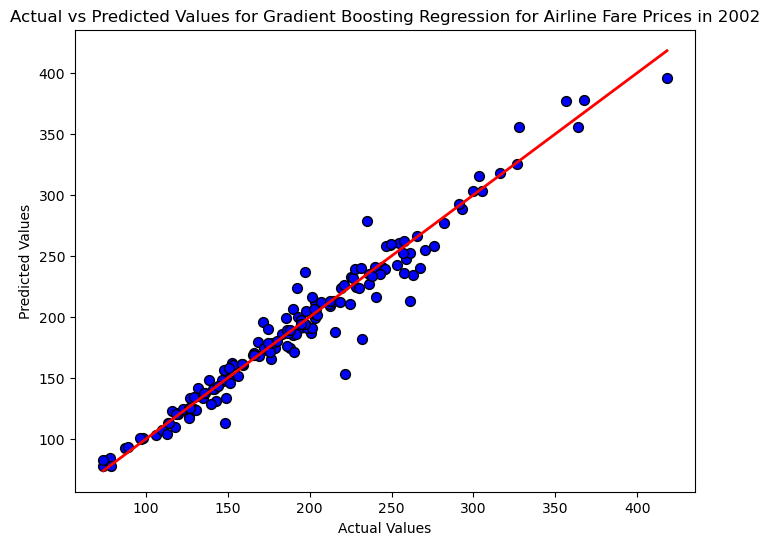

mse:  178.57538898252548
r_squared:  0.9567225017779164


In [395]:
y_pred_reg = gb_reg.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, edgecolors='k', c='blue', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Gradient Boosting Regression for Airline Fare Prices in 2002')
plt.show()
print('mse: ',mse_grad_boost)
print('r_squared: ',r2_grad_boost)

In [253]:
feature_highest_scoring = gb_reg.feature_importances_
feature_names = X_train.columns 
highest_scoring_predictors_df = pd.DataFrame({
    'Feature': feature_names,
    'Highest Scoring Predictors': feature_highest_scoring
})
highest_scoring_features_df = highest_scoring_predictors_df.sort_values(by='Highest Scoring Predictors', ascending=False)
print("Top scoring predictors for fare:")
print(highest_scoring_features_df)

Top scoring predictors for fare:
           Feature  Highest Scoring Predictors
4          fare_lg                9.218541e-01
6         fare_low                5.536000e-02
1          nsmiles                5.957038e-03
3         large_ms                4.740495e-03
2       passengers                3.534721e-03
5            lf_ms                2.746451e-03
32  carrier_low_NK                1.651532e-03
17   carrier_lg_NK                9.832287e-04
19   carrier_lg_TZ                7.453664e-04
0          quarter                5.162125e-04
20   carrier_lg_UA                4.587395e-04
15   carrier_lg_HP                4.293890e-04
10   carrier_lg_AA                2.100513e-04
22   carrier_lg_WN                1.762966e-04
29  carrier_low_HP                1.496255e-04
21   carrier_lg_US                9.292352e-05
36  carrier_low_UA                8.694829e-05
39  carrier_low_YX                8.625422e-05
13   carrier_lg_DL                3.890559e-05
37  carrier_low_US         